In [ ]:
!pip install scikit-learn

In [2]:
!pip install matplotlib

In [3]:
!pip install numpy
!pip install scaborn
!pip install plotly

ERROR: Could not find a version that satisfies the requirement scaborn (from versions: none)
ERROR: No matching distribution found for scaborn


In [4]:
!pip install seaborn
!pip install plotly

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('Dhaka Rent.csv')

In [7]:
df.head() # show 5 default row

,area;rent
0,2000;31500
1,2100;35000
2,2500;41050
3,2250;36100
4,3000;52100


In [8]:
df = pd.read_csv('Dhaka Rent.csv',sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [9]:
df.shape # 2-column, 60-row

(60, 2)

In [10]:
df.corr() 
# correlation between area and rent is almost 0.97 means highly correlated and changes in area highly impact on rent

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


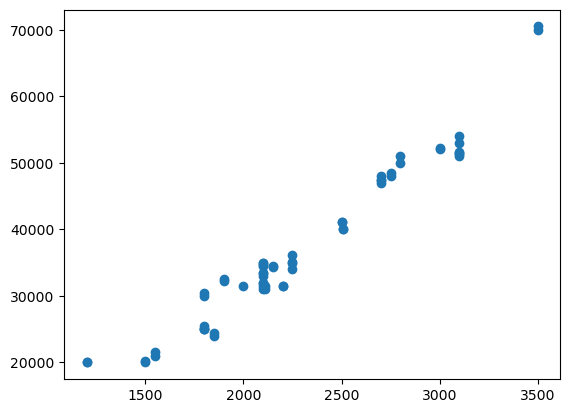

In [11]:
plt.scatter(df['area'],df['rent'])
# by using matplotlib's pyplot, we can visualize it

Text(0.5, 1.0, 'House rents in Dhaka')

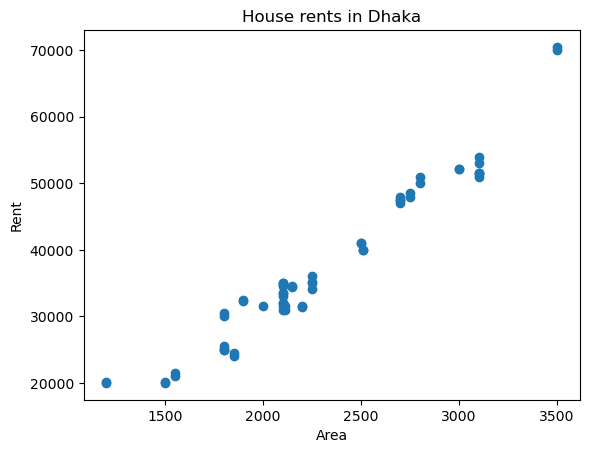

In [12]:
plt.scatter(df['area'],df['rent'])
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('House rents in Dhaka')

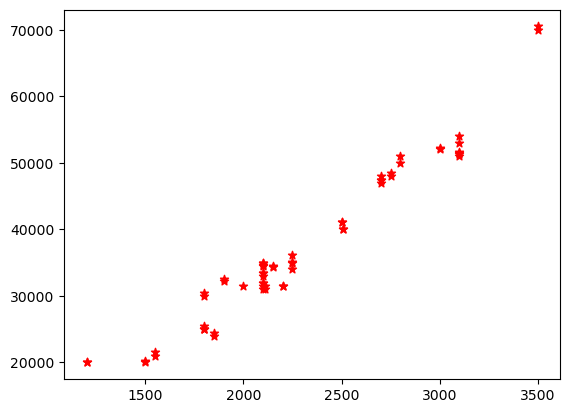

In [13]:
plt.scatter(df['area'],df['rent'],color ='red',marker ='*')

In [14]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


# 1.Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
# 2.Intercept, c = ȳ - m * x

Raw code

In [15]:
x = df['area'] # for sklearn --> 2D but here 1D
y = df['rent']

In [16]:
mean_x = np.mean(x)
mean_y =np.mean(y)

In [17]:
mean_x

2289.0

In [18]:
mean_y

37269.166666666664

In [19]:
dev_x = x-mean_x
dev_y =y-mean_y

In [20]:
coefficient_m =np.sum(dev_x*dev_y)/np.sum(dev_x**2)
coefficient_m

21.292661473611954

In [21]:
intercept = mean_y -(coefficient_m*mean_x)
#c = ȳ - m * x(mean_x)
intercept

-11469.7354464311

In [22]:
prediction = (coefficient_m*2000) + intercept # y = mx+c
prediction

31115.58750079281

In [23]:
df.head(2) # 31500

,area,rent
0,2000,31500
1,2100,35000


# Sklearn

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()


In [26]:
reg.fit(df[['area']],df[['rent']])

LinearRegression()

In [27]:
reg.coef_ # by using sklearn

array([[21.29266147]])

In [28]:
coefficient_m #manual

21.292661473611954

In [29]:
reg.intercept_

array([-11469.73544643])

In [30]:
reg.predict([[2000]])

C:\Users\dipda\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [32]:
pred = reg.predict(df[['area']])
pred

array([[31115.58750079],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],
       [34309.48672183],
       [33244.85364815],
       [33244.85364815],
       [41974.84485233],
       [36438.7528692 ],
       [54537.51512177],
       [26857.05520607],
       [21533.88983767],
       [26857.05520607],
       [46020.45053232],
       [33457.78026289],
       [33244.85364815],
       [63054.57971121],
       [14081.4583219 ],
       [48149.71667968],
       [54537.51512177],
       [47085.083606  ],
       [26857.05520607],
       [35374.11979552],
       [54537.51512177],
       [33244.85364815],
       [33244.85364815],
       [41761.9182376 ],
       [36438.7528692 ],
       [52408.2489744 ],
       [28986.32135343],
       [20469.25676399],
       [27921.68827975],
       [46020.45053232],
       [33244.85364815],


In [34]:
df['predicted rent'] = reg.predict(df[['area']])
df.head()

,area,rent,predicted rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


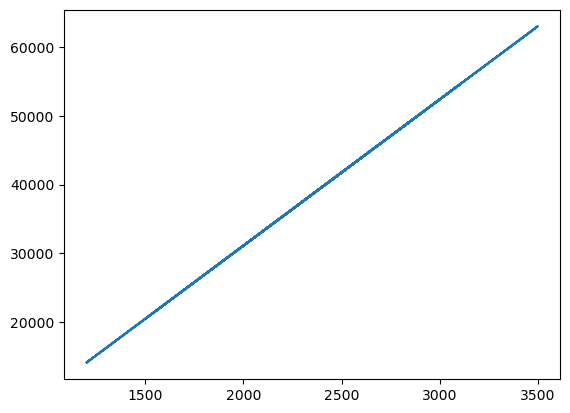

In [35]:
plt.plot(df[['area']],reg.predict(df[['area']]))
# here I take area and predicted area for creating graph (line).

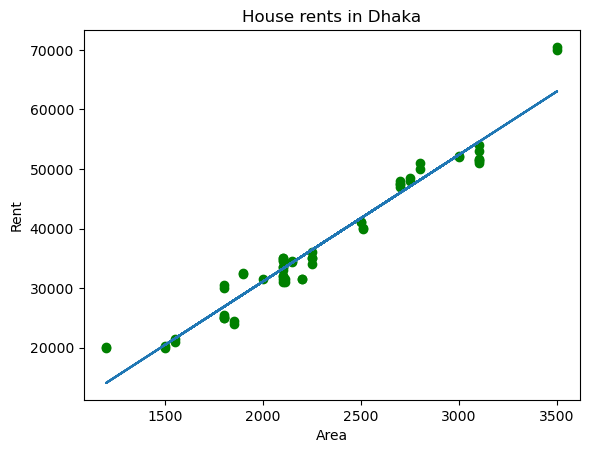

In [38]:
plt.scatter(df['area'],df['rent'],color ='green')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('House rents in Dhaka')
plt.plot(df[['area']],reg.predict(df[['area']]))

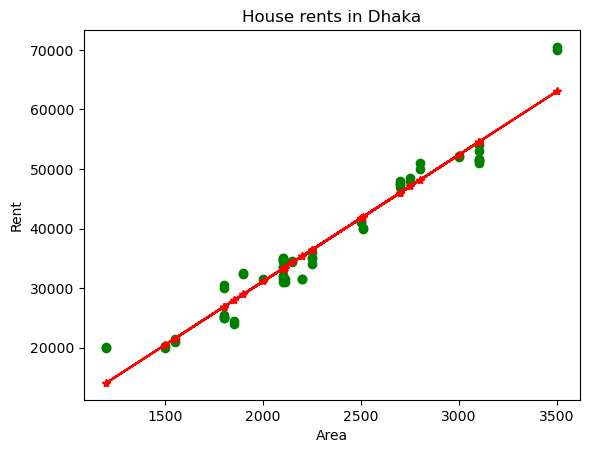

In [39]:
plt.scatter(df['area'],df['rent'],color ='green')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('House rents in Dhaka')
plt.plot(df[['area']],reg.predict(df[['area']]),marker ='*' ,color = 'red')

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# MSE & MAE & RMSE

In [44]:
mse = mean_squared_error(df['rent'],df['predicted rent']) #actual - predicted 
mse

6778077.204095561

In [47]:
mae = mean_absolute_error(df['rent'],df['predicted rent'])
mae

2009.8695093576282

# RMSE

In [48]:
import math

In [50]:
math.sqrt(mse)

2603.474064417689